In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json

## Load Data

In [33]:
# Function to load a JSON file and return its content
def load_data(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return pd.DataFrame(data)

# Load the JSON files
df1 = load_data('Data/daytr.json')
df2 = load_data('Data/inv.json')
df3 = load_data('Data/stocks.json')
df4 = load_data('Data/wsb_cleaned.json')

# Combine DataFrames
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

               date                                              title text
0        1241042792            COF Shorts Read this in depth analysis      
1        1241120413                                    Winning Trading     
2        1245719928            Free Training Videos Courtesy of INO TV     
3        1248409823  A little change from emini contracts: Lets loo...     
4        1256560900        ES Emini: Daily Pivot and Fed Announcements     
...             ...                                                ...  ...
1172248  1672529374                                              Sadly     
1172249  1672529432                                              Sadly     
1172250  1672530372  Please identify which one of you was sitting o...     
1172251  1672530608                                            Society     
1172252  1672530708                             Me at the end of 2022.     

[1172253 rows x 3 columns]


## Number of Posts per Day

In [35]:
#Convert 'date' column from UNIX timestamp to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'], unit='s')

# Filter posts after 2020
df_2020 = combined_df[combined_df['date'] >= '2020-01-01']

# Count the number of posts per day
posts_per_day_2020 = df_2020['date'].dt.date.value_counts().sort_index()

/var/folders/yn/cf39z6fs23d7nd6ymd6g3tq40000gn/T/ipykernel_22574/2024974279.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  combined_df['date'] = pd.to_datetime(combined_df['date'], unit='s')


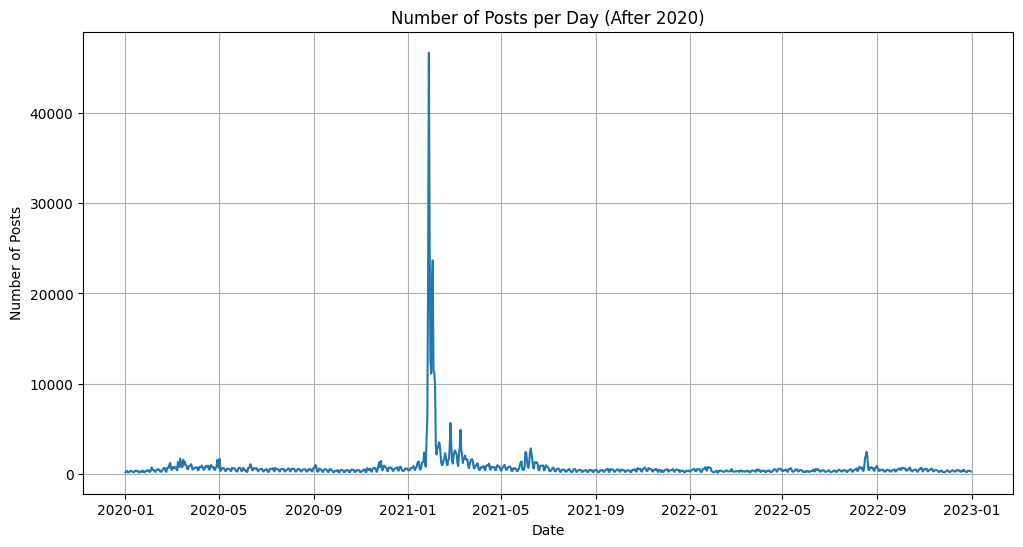

In [36]:
# Plot the number of posts per day
plt.figure(figsize=(12, 6))
posts_per_day_2020.plot(kind='line')
plt.title('Number of Posts per Day (After 2020)')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

In [37]:
mean_posts_per_day = posts_per_day_2020.mean()
print(f"Mean number of posts per day after 2020: {mean_posts_per_day}")

Mean number of posts per day after 2020: 731.970802919708


In [38]:
df_before_2020 = combined_df[combined_df['date'] < '2020-01-01']
posts_per_day_before_2020 = df_before_2020['date'].dt.date.value_counts().sort_index()
mean_posts_per_day_before_2020 = posts_per_day_before_2020.mean()
print(mean_posts_per_day_before_2020)


90.8676326129666


## Number of posts per day for each subreddit

/var/folders/yn/cf39z6fs23d7nd6ymd6g3tq40000gn/T/ipykernel_22574/2709563718.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['date'] = pd.to_datetime(df['date'], unit='s')
/var/folders/yn/cf39z6fs23d7nd6ymd6g3tq40000gn/T/ipykernel_22574/2709563718.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['date'] = pd.to_datetime(df['date'], unit='s')
/var/folders/yn/cf39z6fs23d7nd6ymd6g3tq40000gn/T/ipykernel_22574/2709563718.py:4: FutureWarning: The behavior of 'to_datetime' wit

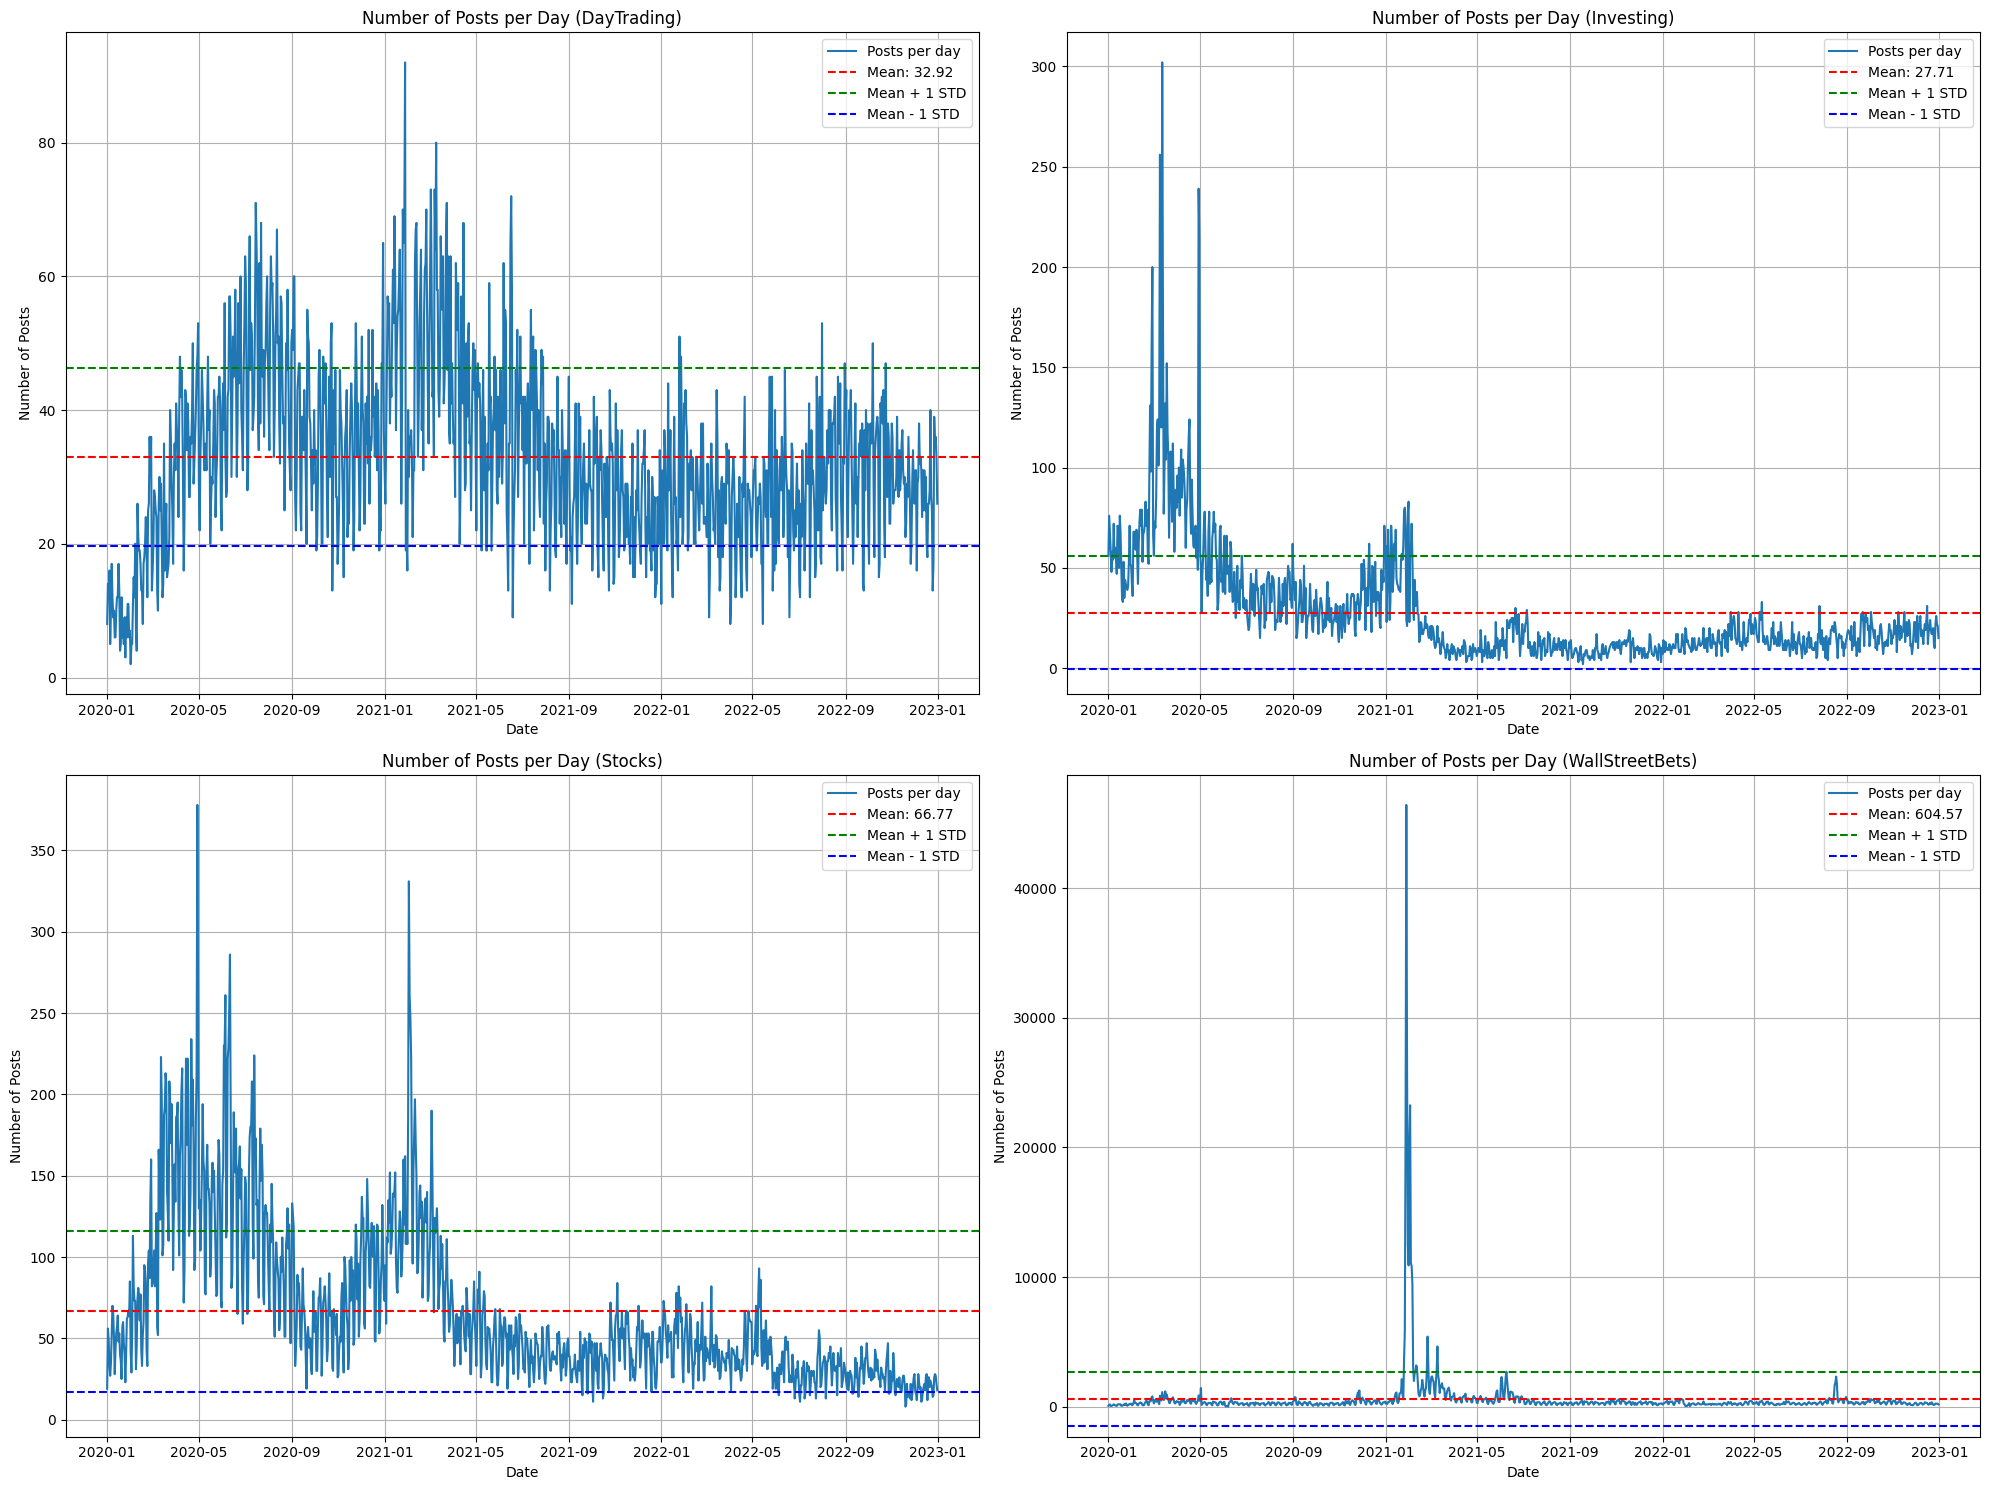

In [39]:
# Convert 'date' columns from UNIX timestamp to datetime
dfs = [df1, df2, df3, df4]
for df in dfs:
    df['date'] = pd.to_datetime(df['date'], unit='s')

# Define the function to plot number of posts per day with mean and variance lines
def plot_posts_per_day_with_stats(df, title):
    # Filter posts starting in 2020
    df_filtered = df[df['date'] >= '2020-01-01']
    
    # Count the number of posts per day
    posts_per_day = df_filtered['date'].dt.date.value_counts().sort_index()
    
    # Calculate the mean and variance
    mean_posts_per_day = posts_per_day.mean()
    std_posts_per_day = posts_per_day.std()
    
    # Plot the number of posts per day
    plt.plot(posts_per_day, label='Posts per day')
    plt.axhline(mean_posts_per_day, color='r', linestyle='--', label=f'Mean: {mean_posts_per_day:.2f}')
    plt.axhline(mean_posts_per_day + std_posts_per_day, color='g', linestyle='--', label=f'Mean + 1 STD')
    plt.axhline(mean_posts_per_day - std_posts_per_day, color='b', linestyle='--', label=f'Mean - 1 STD')
    plt.title(f'Number of Posts per Day ({title})')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.legend()
    plt.grid(True)

# Plot the number of posts per day with mean and variance lines for each dataset
titles = ['DayTrading', 'Investing', 'Stocks', 'WallStreetBets']
plt.figure(figsize=(20, 15))
for i, (df, title) in enumerate(zip(dfs, titles)):
    plt.subplot(2, 2, i + 1)
    plot_posts_per_day_with_stats(df, title)
plt.tight_layout()
plt.show()

In [40]:
# Compute the mean number of posts per day across all datasets
all_posts_per_day = pd.Series(dtype=int)

for df in dfs:
    # Filter posts starting in 2020
    df_filtered = df[df['date'] >= '2020-01-01']

    # Count the number of posts per day
    posts_per_day = df_filtered['date'].dt.date.value_counts().sort_index()

    # Combine with the existing series
    all_posts_per_day = all_posts_per_day.add(posts_per_day, fill_value=0)

# Calculate the mean number of posts per day across all datasets
mean_posts_per_day_across_datasets = all_posts_per_day.mean()

print(f"Mean number of posts per day across all datasets: {mean_posts_per_day_across_datasets:.2f}")

Mean number of posts per day across all datasets: 731.97


## More statistics on the posts

In [41]:
# Convert Unix timestamp to datetime and filter by date
def preprocess_data(df):
    df['date'] = pd.to_datetime(df['date'], unit='s')
    # Filter data from 2020 onwards
    df = df[df['date'] >= '2020-01-01']
    return df

In [42]:

# Basic statistics
def basic_statistics(df, stock_name):
    print(f'Basic Statistics for {stock_name}')
    print(f'Number of posts: {len(df)}')
    print(f'Average length of posts: {df["text"].str.len().mean()}')

In [43]:
# Compare average number of posts per day
def compare_average_posts_per_day(dfs, stock_names):
    avg_posts_per_day = [df.resample('D', on='date').size().mean() for df in dfs]
    avg_posts_per_day_df = pd.DataFrame({'Stock': stock_names, 'Average Number of Posts per Day': avg_posts_per_day})
    avg_posts_per_day_df.plot(kind='bar', x='Stock', y='Average Number of Posts per Day', legend=False, color=sns.color_palette('Set2', len(stock_names)), figsize=(10, 5))
    plt.title('Average Number of Posts per Day from 2020')
    plt.xlabel('Stock')
    plt.ylabel('Average Number of Posts per Day')
    plt.show()

In [44]:
# Compare variance in the number of posts per day
def compare_variance_posts_per_day(dfs, stock_names):
    variance_posts_per_day = [df.resample('D', on='date').size().var() for df in dfs]
    variance_posts_per_day_df = pd.DataFrame({'Stock': stock_names, 'Variance in Number of Posts per Day': variance_posts_per_day})
    variance_posts_per_day_df.plot(kind='bar', x='Stock', y='Variance in Number of Posts per Day', legend=False, color=sns.color_palette('Set2', len(stock_names)), figsize=(10, 5))
    plt.title('Variance in Number of Posts per Day from 2020')
    plt.xlabel('Stock')
    plt.ylabel('Variance in Number of Posts per Day')
    plt.show()

In [45]:
# Compare average length of posts
def compare_average_length_of_posts(dfs, stock_names):
    avg_length_posts = [df['text'].str.len().mean() for df in dfs]
    avg_length_posts_df = pd.DataFrame({'Stock': stock_names, 'Average Length of Posts': avg_length_posts})
    avg_length_posts_df.plot(kind='bar', x='Stock', y='Average Length of Posts', legend=False, color=sns.color_palette('Set2', len(stock_names)), figsize=(10, 5))
    plt.title('Average Length of Posts from 2020')
    plt.xlabel('Stock')
    plt.ylabel('Average Length of Posts')
    plt.show()

/var/folders/yn/cf39z6fs23d7nd6ymd6g3tq40000gn/T/ipykernel_22574/2565308249.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['date'] = pd.to_datetime(df['date'], unit='s')
/var/folders/yn/cf39z6fs23d7nd6ymd6g3tq40000gn/T/ipykernel_22574/2565308249.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['date'] = pd.to_datetime(df['date'], unit='s')
/var/folders/yn/cf39z6fs23d7nd6ymd6g3tq40000gn/T/ipykernel_22574/2565308249.py:3: FutureWarning: The behavior of 'to_datetime' wit

Basic Statistics for Apple
Number of posts: 12747
Average length of posts: 301.9833686357574
Basic Statistics for Amazon
Number of posts: 10978
Average length of posts: 327.4178356713427
Basic Statistics for Tesla
Number of posts: 32784
Average length of posts: 291.21071254270373
Basic Statistics for Google
Number of posts: 12477
Average length of posts: 275.1655846758035


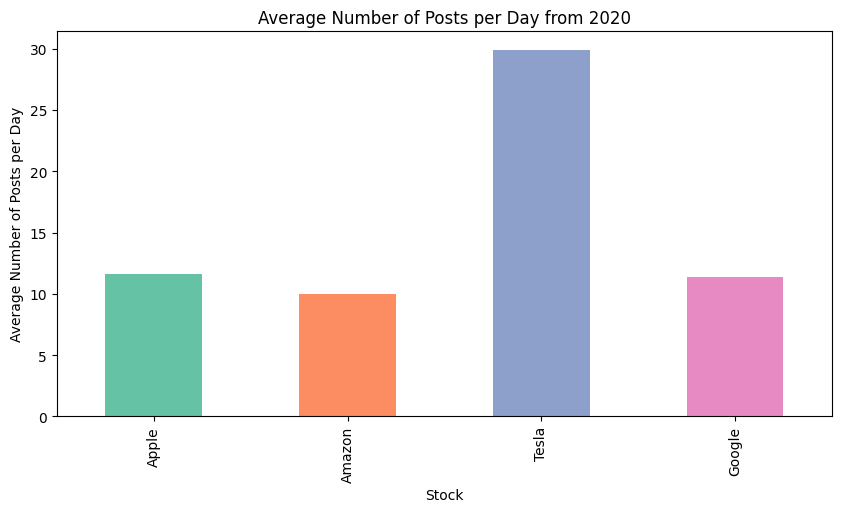

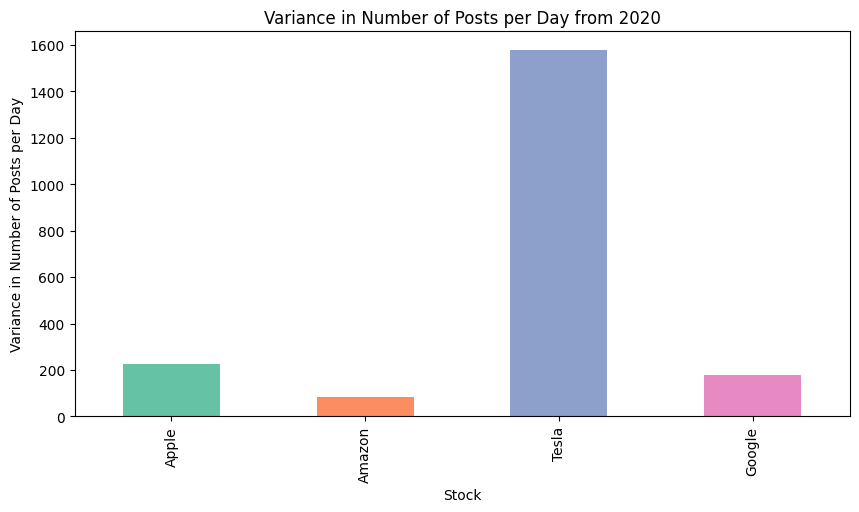

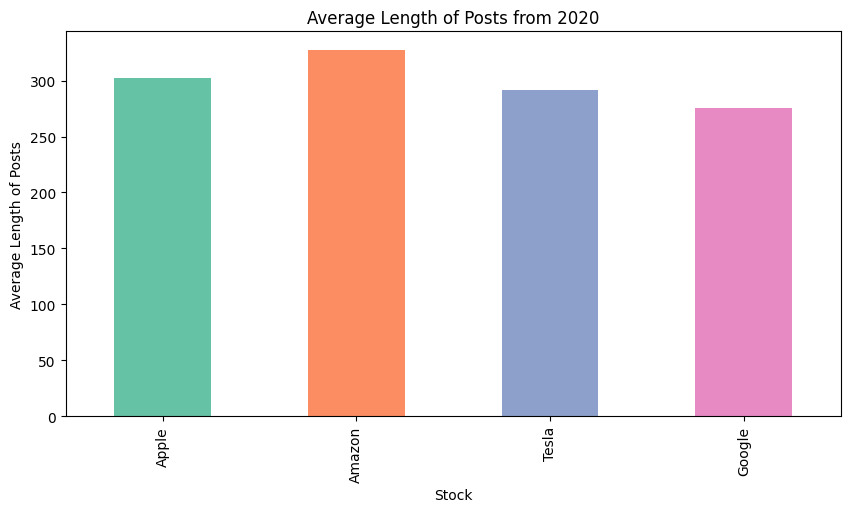

In [46]:
# Load and preprocess datasets
apple_df = preprocess_data(load_data('Data/apple_comments.json'))
amazon_df = preprocess_data(load_data('Data/amazon_comments.json'))
tesla_df = preprocess_data(load_data('Data/tesla_comments.json'))
google_df = preprocess_data(load_data('Data/google_comments.json'))

# Perform EDA
for df, stock in zip([apple_df, amazon_df, tesla_df, google_df], ['Apple', 'Amazon', 'Tesla', 'Google']):
    basic_statistics(df, stock)

# Compare average number of posts per day
compare_average_posts_per_day([apple_df, amazon_df, tesla_df, google_df], ['Apple', 'Amazon', 'Tesla', 'Google'])

# Compare variance in number of posts per day
compare_variance_posts_per_day([apple_df, amazon_df, tesla_df, google_df], ['Apple', 'Amazon', 'Tesla', 'Google'])

# Compare average length of posts
compare_average_length_of_posts([apple_df, amazon_df, tesla_df, google_df], ['Apple', 'Amazon', 'Tesla', 'Google'])
